<!--
#  **ML Campus Batch Aug 2022 - Bangalore**
### Assignment 3 --> 
Using the Plant Seedlings Dataset for understanding diff models and using the best model for predicting the test dataset (loading, saving, using)
<!--
###### submitted by: Neeraj Ganji 
###### submitted on: 12th sep 2022

ID: 23133
-->

##### Importing required libraries




In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import fnmatch
import seaborn as sns
import cv2
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras.models import Sequential, Model



### **PART - 1 : Functions to load the data, normalize the data, OHE for categories.**

##### Downloading the Dataset from kaggle

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"neerajganji","key":"991bfb72e972baaa1296f4374c47d43c"}'}

In [ ]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c plant-seedlings-classification

100% 1.68G/1.69G [00:07<00:00, 252MB/s]
100% 1.69G/1.69G [00:07<00:00, 251MB/s]


##### Unzipping the files

In [ ]:
!unzip plant-seedlings-classification.zip #Unzipping the files

Streaming output truncated to the last 5000 lines.
  inflating: test/ad12382d4.png      
  inflating: test/adb7a032c.png      
  inflating: test/ae90f2827.png      
  inflating: test/aecfaed64.png      
  inflating: test/aee6fa3df.png      
  inflating: test/af45e222a.png      
  inflating: test/afa446484.png      
  inflating: test/afcf6abd5.png      
  inflating: test/b026bf8ca.png      
  inflating: test/b03397525.png      
  inflating: test/b0acaff4a.png      
  inflating: test/b130a0632.png      
  inflating: test/b145ba9d4.png      
  inflating: test/b1cd2a91e.png      
  inflating: test/b215531dd.png      
  inflating: test/b2706e2b3.png      
  inflating: test/b29339405.png      
  inflating: test/b30ab4659.png      
  inflating: test/b31292706.png      
  inflating: test/b341d0aab.png      
  inflating: test/b39c71707.png      
  inflating: test/b3d6fdb80.png      
  inflating: test/b3e08b037.png      
  inflating: test/b47691c08.png      
  inflating: test/b4c3df835.png      

##### Loading the training data and test data

In [ ]:
train_data = sorted(os.listdir('/content/train'))
test_data = sorted(os.listdir('/content/test'))
print(train_data)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [ ]:
classes = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']

##### Plotting the classes and no.of images in each class using seaborn


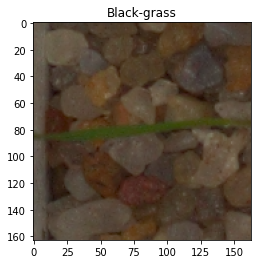

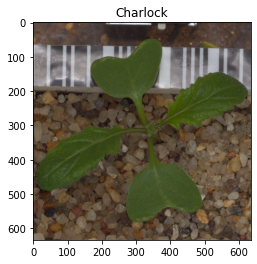

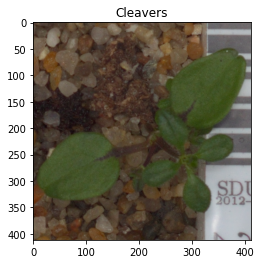

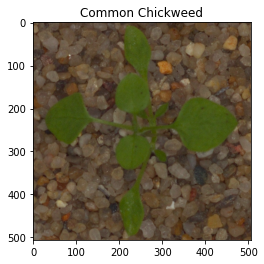

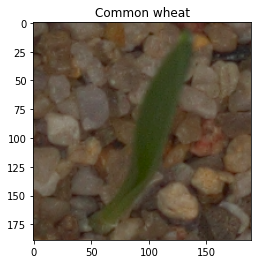

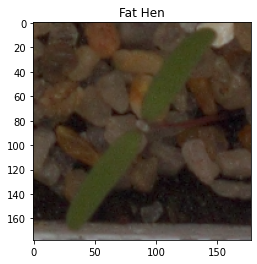

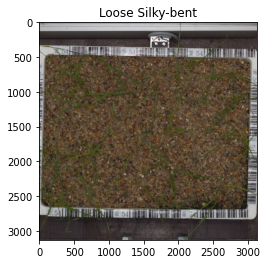

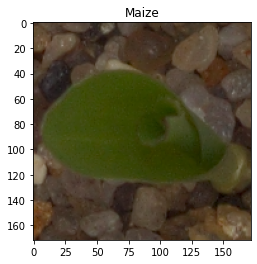

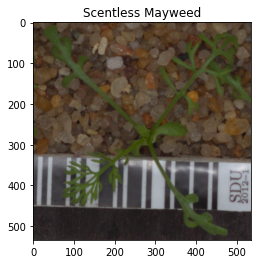

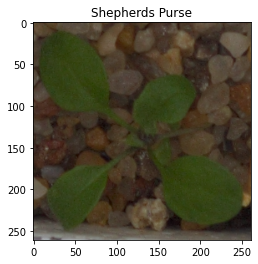

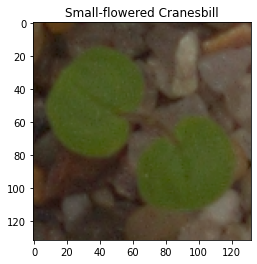

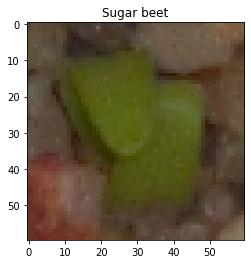

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import os, random
import numpy
for i in range(12):
  x= "/content/train/"+classes[i]+'/'+random.choice(os.listdir('/content/train/'+classes[i]))
  plt.title(classes[i])
  im = img.imread(x)
  plt.imshow(numpy.real(im))
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


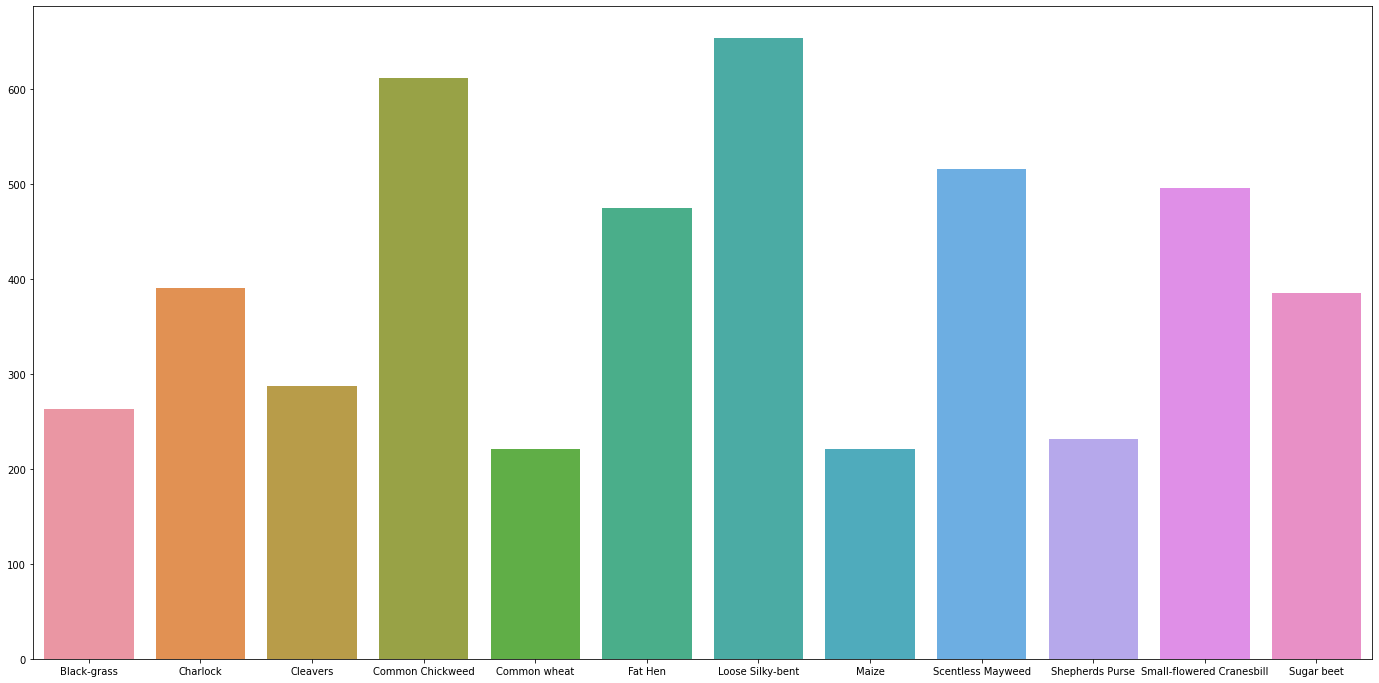

In [ ]:
def get_count(path, classes):
  count = []
  for class_name in classes:
    count.append(len(os.listdir(path+class_name)))
  return count

sns.barplot(classes, get_count('/content/train/',classes))
plt.gcf().set_size_inches(24, 12)
plt.show()

### **PART - 3 : Use pre-trained VGG16, ResNet50 and InceptionV3 networks to extract bottleneck features and build a model on top of each of them to evaluate and compare the model performances. (Model performances include classification report, confusion matrices, plots of Loss Vs Epochs).**

#### VGG_16 MODEL

##### Importing the model after that Getting the training images and its respective labels using One hot encoding and splitting the train data into training data and test data using sklearn


In [ ]:
from keras.applications.vgg16 import preprocess_input

train_dir = '/content/train'
train_label = []
train_img = []
labels_dict = {'Black-grass' : 0, 'Charlock' : 1, 'Cleavers' : 2, 'Common Chickweed' : 3,
               'Common wheat' : 4, 'Fat Hen' : 5, 'Loose Silky-bent' : 6,
               'Maize' : 7, 'Scentless Mayweed' : 8, 'Shepherds Purse' : 9,
               'Small-flowered Cranesbill' : 10, 'Sugar beet' : 11}
for i in os.listdir(train_dir):
        label_num = labels_dict[i]
        new_path = os.path.join(train_dir, i)

        for j in fnmatch.filter(os.listdir(new_path), '*.png'):
            img = tf.keras.preprocessing.image.load_img( os.path.join(new_path, j),
                                                        target_size = (128 ,128 ,3))
            img = tf.keras.preprocessing.image.img_to_array(img)
            train_img.append(img)
            train_label.append(label_num)   
        print(i)

train_label = pd.get_dummies(train_label)
train_label = np.array(train_label)
train_img = np.array(train_img)
train_img = preprocess_input(train_img)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_img, train_label,
                                                      test_size=0.15, random_state=0)


Small-flowered Cranesbill
Fat Hen
Scentless Mayweed
Shepherds Purse
Common wheat
Black-grass
Sugar beet
Charlock
Loose Silky-bent
Maize
Common Chickweed
Cleavers



##### Importing the VGG16  pretrained model


In [ ]:
pretrained_vgg16_model = tf.keras.applications.vgg16.VGG16( include_top = False,
                                                           weights = 'imagenet',
                                                           pooling = 'avg',
                                                           classes = 12, 
                                                           input_shape =(128 , 128 ,3)
                                                           )

for layer in pretrained_vgg16_model.layers:
        layer.trainable = False


##### creating a model by using vgg16 pretrained model


In [ ]:
from keras import layers, models
vgg_model = Sequential()
vgg_model.add(pretrained_vgg16_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(1024, activation='relu'))
vgg_model.add(layers.Dropout(0.5))
vgg_model.add(layers.BatchNormalization())
vgg_model.add(Dense(128, activation='relu'))
vgg_model.add(Dense(12, activation='softmax'))

##### compiling the model


In [ ]:
vgg_model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)



##### training the model


In [ ]:
vgg_model_history = vgg_model.fit(x_train , y_train ,
                                  validation_data = [x_test,y_test] , epochs = 15 )



Epoch 1/15
127/127 [==============================] - 9s 68ms/step - loss: 1.5942 - accuracy: 0.4635 - val_loss: 1.0442 - val_accuracy: 0.6452
Epoch 2/15
127/127 [==============================] - 8s 66ms/step - loss: 1.0660 - accuracy: 0.6287 - val_loss: 0.8997 - val_accuracy: 0.6957
Epoch 3/15
127/127 [==============================] - 8s 66ms/step - loss: 0.9059 - accuracy: 0.6787 - val_loss: 0.8684 - val_accuracy: 0.7111
Epoch 4/15
127/127 [==============================] - 8s 66ms/step - loss: 0.7905 - accuracy: 0.7161 - val_loss: 0.8225 - val_accuracy: 0.7265
Epoch 5/15
127/127 [==============================] - 8s 65ms/step - loss: 0.7698 - accuracy: 0.7156 - val_loss: 0.8534 - val_accuracy: 0.7195
Epoch 6/15
127/127 [==============================] - 8s 65ms/step - loss: 0.6961 - accuracy: 0.7468 - val_loss: 0.8370 - val_accuracy: 0.6971
Epoch 7/15
127/127 [==============================] - 8s 64ms/step - loss: 0.6844 - accuracy: 0.7563 - val_loss: 0.8691 - val_accuracy: 0.7195

##### storing the predicted data in OHE type 


In [ ]:
pred = vgg_model.predict(x_test)
y_pred = []
for i in pred:
  l = [0]*12
  a = np.argmax(i)
  l[a] = 1
  l = np.array(l)
  y_pred.append(l)
y_pred = np.array(y_pred)
temp=[]
for i in y_test:
  temp.append(classes[np.argmax(i)])
temp = np.array(temp)
temp_1=[]
for i in y_pred:
  temp_1.append(classes[np.argmax(i)])
temp_1 = np.array(temp_1)

##### classification report


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.57      0.37      0.45        46
           1       0.80      0.79      0.80        57
           2       0.72      0.78      0.75        37
           3       0.85      0.84      0.84        85
           4       0.71      0.79      0.75        28
           5       0.75      0.79      0.77        72
           6       0.74      0.82      0.78       101
           7       0.92      0.92      0.92        37
           8       0.84      0.71      0.77        86
           9       0.40      0.45      0.42        31
          10       0.73      0.80      0.76        80
          11       0.88      0.85      0.87        53

   micro avg       0.76      0.76      0.76       713
   macro avg       0.74      0.74      0.74       713
weighted avg       0.76      0.76      0.76       713
 samples avg       0.76      0.76      0.76       713



##### confusion matrix


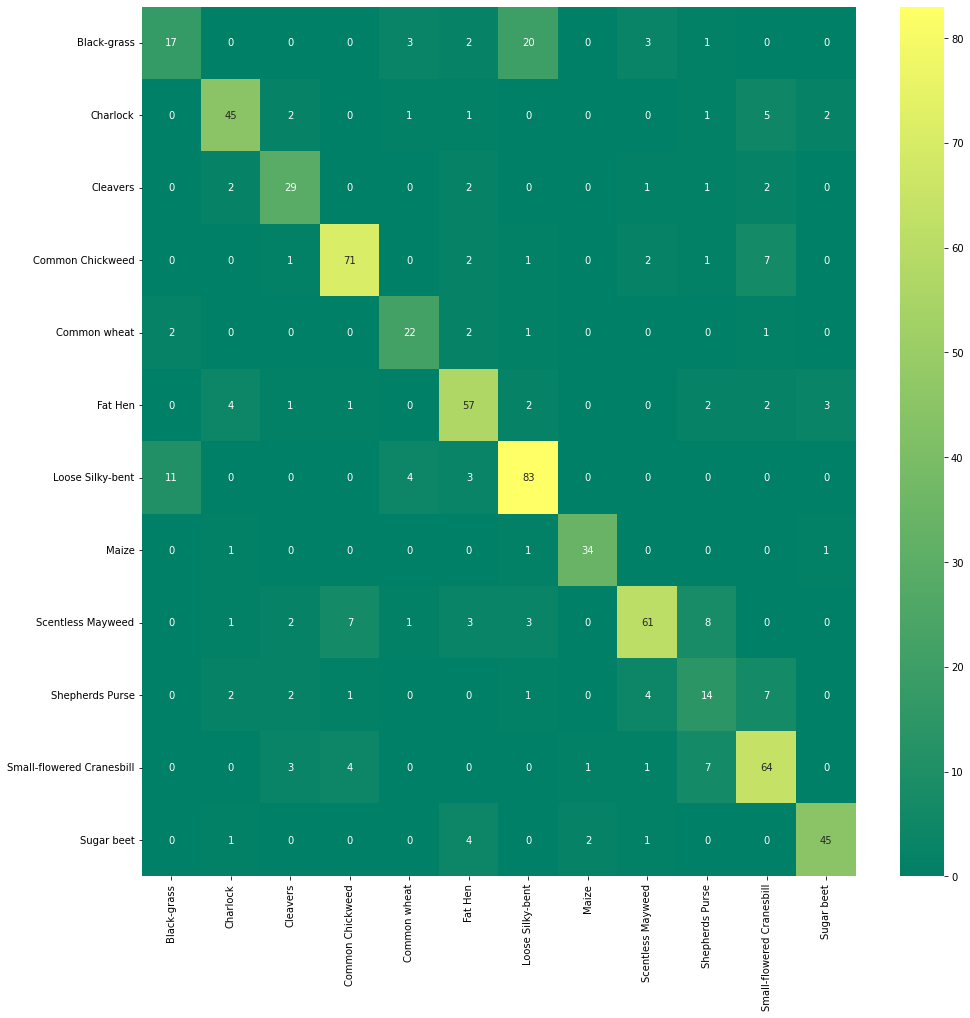

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(temp,temp_1)
cm_df = pd.DataFrame(cm,classes,classes)
plt.figure(figsize = (16,16))
sns.heatmap(cm_df , annot = True, cmap='summer')



##### visualizing the training results (plots of loss vs epochs)


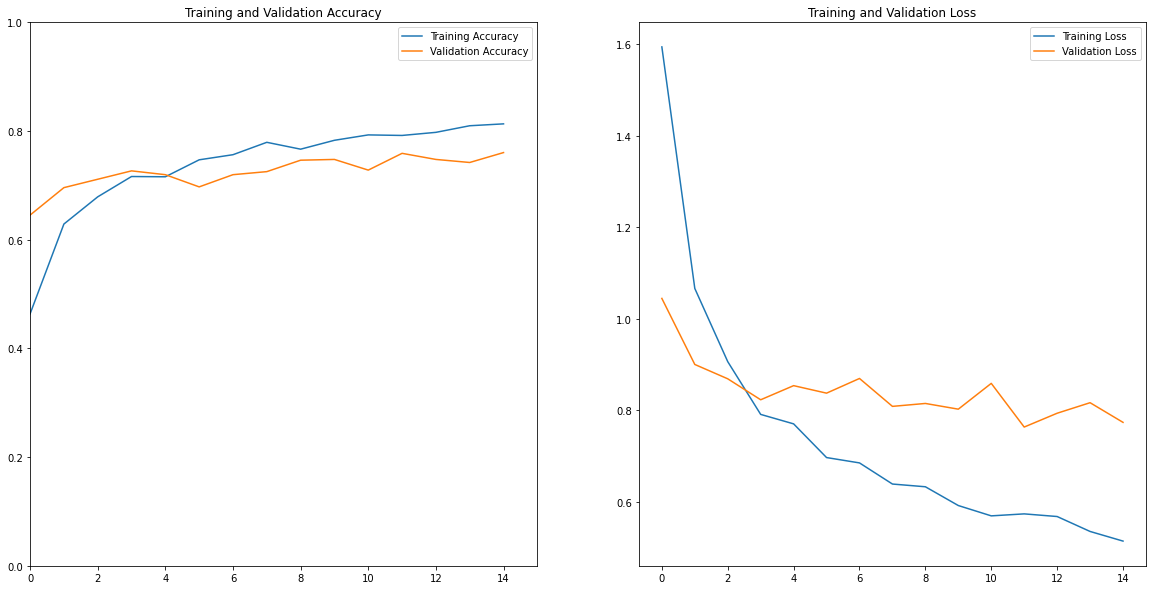

In [ ]:
acc = vgg_model_history.history['accuracy']
val_acc = vgg_model_history.history['val_accuracy']

loss = vgg_model_history.history['loss']
val_loss = vgg_model_history.history['val_loss']

epochs = range(15)

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlim([0,15])
plt.ylim([0,1])

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

#### INCEPTION_V3 MODEL

##### Importing the model after that Getting the training images and its respective labels using One hot encoding and splitting the train data into training data and test data using sklearn


In [ ]:
from keras.applications.inception_v3 import preprocess_input
train_dir = '/content/train'
train_label = []
train_img = []
labels_dict = {'Black-grass' : 0, 'Charlock' : 1, 'Cleavers' : 2, 'Common Chickweed' : 3,
               'Common wheat' : 4, 'Fat Hen' : 5, 'Loose Silky-bent' : 6,
               'Maize' : 7, 'Scentless Mayweed' : 8, 'Shepherds Purse' : 9,
               'Small-flowered Cranesbill' : 10, 'Sugar beet' : 11}
for i in os.listdir(train_dir):
        label_num = labels_dict[i]
        new_path = os.path.join(train_dir, i)

        for j in fnmatch.filter(os.listdir(new_path), '*.png'):
            img = tf.keras.preprocessing.image.load_img( os.path.join(new_path, j),
                                                        target_size = (128 ,128 ,3))
            img = tf.keras.preprocessing.image.img_to_array(img)
            train_img.append(img)
            train_label.append(label_num)   
        print(i)

train_label = pd.get_dummies(train_label)
train_label = np.array(train_label)
train_img = np.array(train_img)
train_img = preprocess_input(train_img)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_img, train_label,
                                                      test_size=0.15, random_state=0)


Small-flowered Cranesbill
Fat Hen
Scentless Mayweed
Shepherds Purse
Common wheat
Black-grass
Sugar beet
Charlock
Loose Silky-bent
Maize
Common Chickweed
Cleavers


##### Importing the Inception_v3 pretrained model

In [ ]:
pretrained_InceptionV3_model = tf.keras.applications.InceptionV3( include_top = False,
                                                           weights = 'imagenet',
                                                           pooling = 'avg',
                                                           classes = 12, 
                                                           input_shape =(128,128,3)
                                                           )

for layer in pretrained_InceptionV3_model.layers:
        layer.trainable = False


##### creating a model by using InceptionV3 pretrained model


In [ ]:
from keras import layers, models
Inception_model = Sequential()
Inception_model.add(pretrained_InceptionV3_model)
Inception_model.add(Flatten())
Inception_model.add(Dense(2048, activation='relu'))
Inception_model.add(layers.Dropout(0.4))
Inception_model.add(layers.BatchNormalization())
Inception_model.add(Dense(1024, activation='relu'))
Inception_model.add(Dense(12, activation='softmax'))

##### compiling the model


In [ ]:
Inception_model.compile(  
      optimizer = 'adam', 
      loss = 'categorical_crossentropy',
      metrics = ['accuracy'])

##### training the model


In [ ]:
Inception_model_history = Inception_model.fit(x_train , y_train ,
                                  validation_data = [x_test,y_test] , epochs = 15 )


Epoch 1/15
127/127 [==============================] - 12s 60ms/step - loss: 1.9045 - accuracy: 0.4278 - val_loss: 2.0333 - val_accuracy: 0.4600
Epoch 2/15
127/127 [==============================] - 6s 43ms/step - loss: 1.3963 - accuracy: 0.5514 - val_loss: 1.1493 - val_accuracy: 0.6241
Epoch 3/15
127/127 [==============================] - 5s 43ms/step - loss: 1.1365 - accuracy: 0.6136 - val_loss: 1.1347 - val_accuracy: 0.6466
Epoch 4/15
127/127 [==============================] - 5s 39ms/step - loss: 0.9306 - accuracy: 0.6678 - val_loss: 1.0628 - val_accuracy: 0.6536
Epoch 5/15
127/127 [==============================] - 5s 39ms/step - loss: 0.8679 - accuracy: 0.6869 - val_loss: 1.0434 - val_accuracy: 0.6606
Epoch 6/15
127/127 [==============================] - 5s 39ms/step - loss: 0.8132 - accuracy: 0.7040 - val_loss: 1.2980 - val_accuracy: 0.5947
Epoch 7/15
127/127 [==============================] - 5s 42ms/step - loss: 0.8052 - accuracy: 0.7122 - val_loss: 1.1363 - val_accuracy: 0.622

##### storing the predicted data in OHE type 


In [ ]:
pred = Inception_model.predict(x_test)
y_pred = []
for i in pred:
  l = [0]*12
  a = np.argmax(i)
  l[a] = 1
  l = np.array(l)
  y_pred.append(l)
y_pred = np.array(y_pred)
temp=[]
for i in y_test:
  temp.append(classes[np.argmax(i)])
temp = np.array(temp)

temp_1=[]
for i in y_pred:
  temp_1.append(classes[np.argmax(i)])
temp_1 = np.array(temp_1)

##### classification report


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.62      0.11      0.19        46
           1       0.81      0.68      0.74        57
           2       0.80      0.65      0.72        37
           3       0.72      0.71      0.71        85
           4       0.52      0.54      0.53        28
           5       0.60      0.64      0.62        72
           6       0.55      0.81      0.65       101
           7       0.88      0.62      0.73        37
           8       0.65      0.76      0.70        86
           9       0.52      0.35      0.42        31
          10       0.69      0.74      0.71        80
          11       0.75      0.77      0.76        53

   micro avg       0.66      0.66      0.66       713
   macro avg       0.68      0.61      0.62       713
weighted avg       0.67      0.66      0.65       713
 samples avg       0.66      0.66      0.66       713



##### confusion matrix


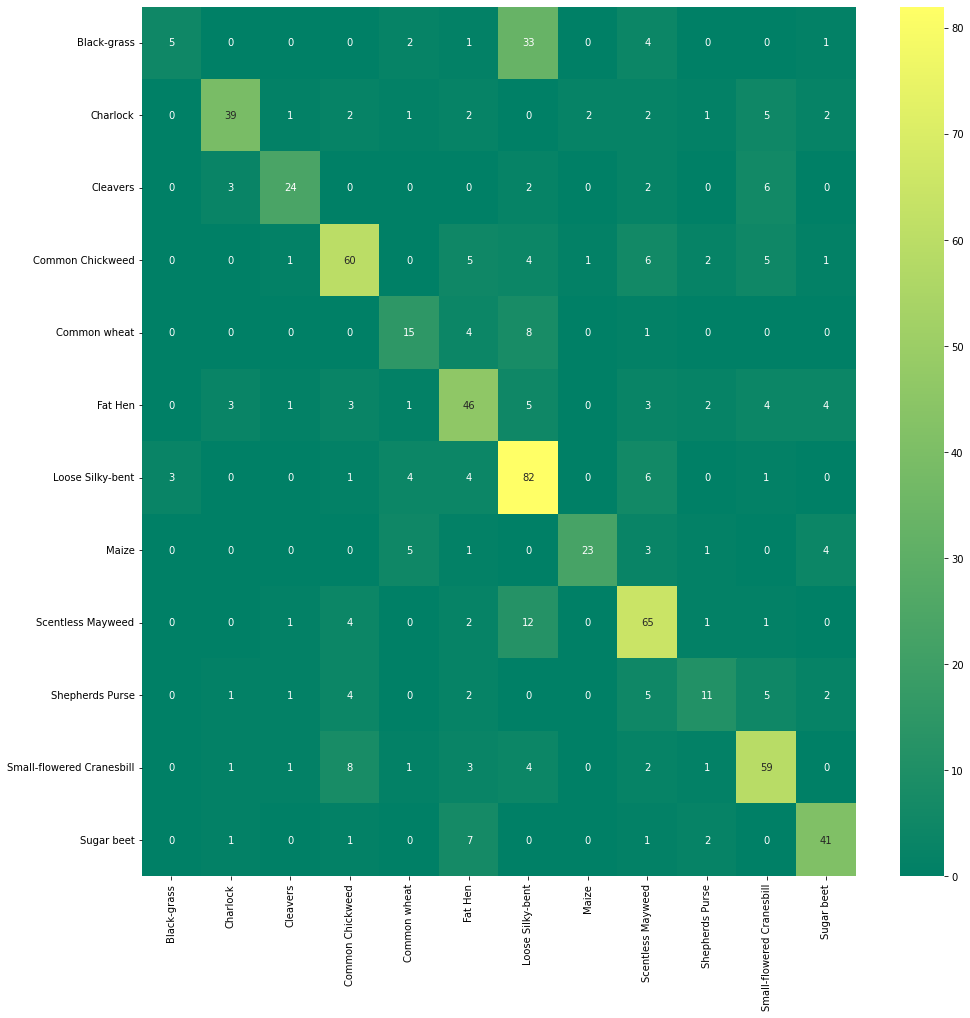

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(temp,temp_1)
cm_df = pd.DataFrame(cm,classes,classes)
plt.figure(figsize = (16,16))
sns.heatmap(cm_df , annot = True, cmap='summer')


##### visualizing the training results (plots of loss vs epochs)


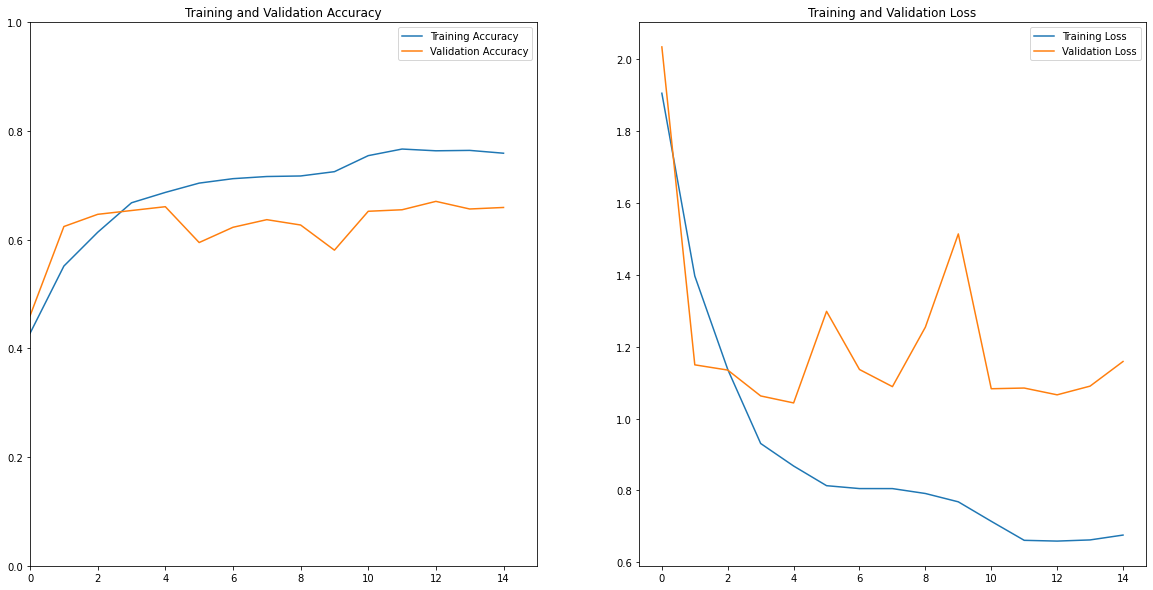

In [ ]:
acc = Inception_model_history.history['accuracy']
val_acc = Inception_model_history.history['val_accuracy']

loss = Inception_model_history.history['loss']
val_loss = Inception_model_history.history['val_loss']

epochs = range(15)

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlim([0,15])
plt.ylim([0,1])


plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


#### RESNET_50 MODEL


##### Importing the model after that Getting the training images and its respective labels using One hot encoding and splitting the train data into training data and test data using sklearn


In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

train_dir = '/content/train'
train_label = []
train_img = []
labels_dict = {'Black-grass' : 0, 'Charlock' : 1, 'Cleavers' : 2, 'Common Chickweed' : 3,
               'Common wheat' : 4, 'Fat Hen' : 5, 'Loose Silky-bent' : 6,
               'Maize' : 7, 'Scentless Mayweed' : 8, 'Shepherds Purse' : 9,
               'Small-flowered Cranesbill' : 10, 'Sugar beet' : 11}
for i in os.listdir(train_dir):
        label_num = labels_dict[i]
        new_path = os.path.join(train_dir, i)

        for j in fnmatch.filter(os.listdir(new_path), '*.png'):
            img = tf.keras.preprocessing.image.load_img( os.path.join(new_path, j),
                                                        target_size = (128 ,128 ,3))
            img = tf.keras.preprocessing.image.img_to_array(img)
            train_img.append(img)
            train_label.append(label_num)   
        print(i)

train_label = pd.get_dummies(train_label)
train_label = np.array(train_label)
train_img = np.array(train_img)
train_img = preprocess_input(train_img)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_img, train_label,
                                                      test_size=0.2, random_state=0)

Loose Silky-bent
Common wheat
Black-grass
Cleavers
Sugar beet
Small-flowered Cranesbill
Maize
Charlock
Fat Hen
Common Chickweed
Shepherds Purse
Scentless Mayweed


##### Importing the Resnet50 pretrained model


In [ ]:
pretrained_Resnet50_model = tf.keras.applications.ResNet50( include_top = False,
                                                           weights = 'imagenet',
                                                           pooling = 'avg',
                                                           classes = 12, 
                                                           input_shape =(128,128,3)
                                                           )

for layer in pretrained_Resnet50_model.layers:
        layer.trainable = False


94781440/94765736 [==============================] - 1s 0us/step


##### creating a model by using Resnet50 pretrained model


In [ ]:
from keras import layers, models
resnet_model = Sequential()
resnet_model.add(pretrained_Resnet50_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(4096, activation='relu'))
resnet_model.add(layers.Dropout(0.5))
resnet_model.add(layers.BatchNormalization())
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(12, activation='softmax'))

##### compiling the model


In [ ]:
resnet_model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

##### training the model


In [ ]:
resnet_model_history = resnet_model.fit(x_train , y_train ,
                                  validation_data = [x_test,y_test] , epochs = 15 )

Epoch 1/15
119/119 [==============================] - 23s 65ms/step - loss: 1.3638 - accuracy: 0.5897 - val_loss: 1.2911 - val_accuracy: 0.6568
Epoch 2/15
119/119 [==============================] - 6s 50ms/step - loss: 0.8318 - accuracy: 0.7250 - val_loss: 0.7730 - val_accuracy: 0.7789
Epoch 3/15
119/119 [==============================] - 6s 50ms/step - loss: 0.6499 - accuracy: 0.7745 - val_loss: 0.6544 - val_accuracy: 0.7716
Epoch 4/15
119/119 [==============================] - 7s 58ms/step - loss: 0.5161 - accuracy: 0.8118 - val_loss: 0.5633 - val_accuracy: 0.8042
Epoch 5/15
119/119 [==============================] - 6s 49ms/step - loss: 0.4722 - accuracy: 0.8345 - val_loss: 0.6021 - val_accuracy: 0.7947
Epoch 6/15
119/119 [==============================] - 6s 51ms/step - loss: 0.4306 - accuracy: 0.8476 - val_loss: 0.5199 - val_accuracy: 0.8179
Epoch 7/15
119/119 [==============================] - 6s 50ms/step - loss: 0.3677 - accuracy: 0.8595 - val_loss: 0.5913 - val_accuracy: 0.810

##### storing the predicted data in OHE type 


In [ ]:
pred = resnet_model.predict(x_test)
y_pred = []
for i in pred:
  l = [0]*12
  a = np.argmax(i)
  l[a] = 1
  l = np.array(l)
  y_pred.append(l)
y_pred = np.array(y_pred)
temp=[]
for i in y_test:
  temp.append(classes[np.argmax(i)])
temp = np.array(temp)

temp_1=[]
for i in y_pred:
  temp_1.append(classes[np.argmax(i)])
temp_1 = np.array(temp_1)

##### classification report


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.64      0.31      0.42        58
           1       0.96      0.89      0.92        83
           2       0.96      0.93      0.94        54
           3       0.97      0.87      0.92       118
           4       0.76      0.88      0.81        40
           5       0.76      0.96      0.85        98
           6       0.72      0.91      0.80       140
           7       0.86      0.97      0.91        37
           8       0.86      0.82      0.84        97
           9       0.87      0.68      0.76        50
          10       0.88      0.92      0.90       100
          11       1.00      0.80      0.89        75

   micro avg       0.85      0.85      0.85       950
   macro avg       0.85      0.83      0.83       950
weighted avg       0.85      0.85      0.84       950
 samples avg       0.85      0.85      0.85       950



##### confusion matrix


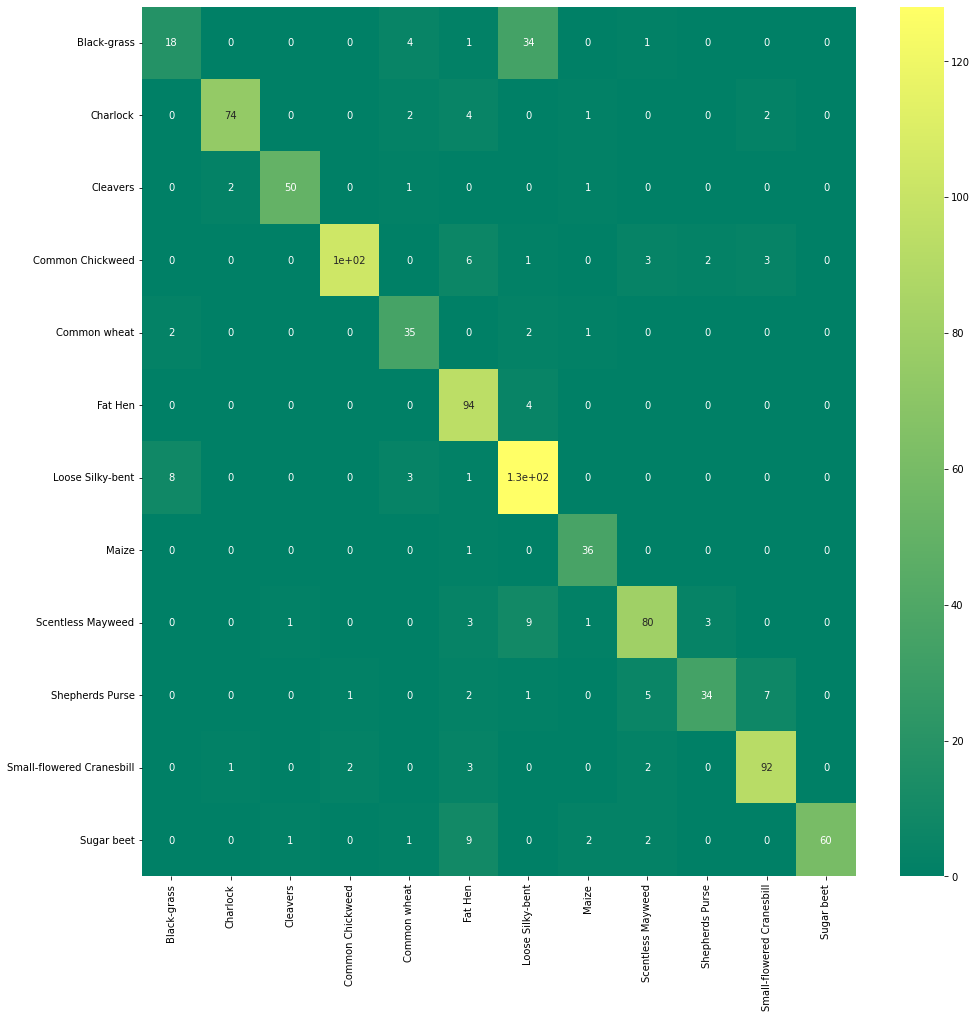

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(temp,temp_1)
cm_df = pd.DataFrame(cm,classes,classes)
plt.figure(figsize = (16,16))
sns.heatmap(cm_df , annot = True, cmap='summer')


##### Visualizing the training results (plot loss vs epochs).





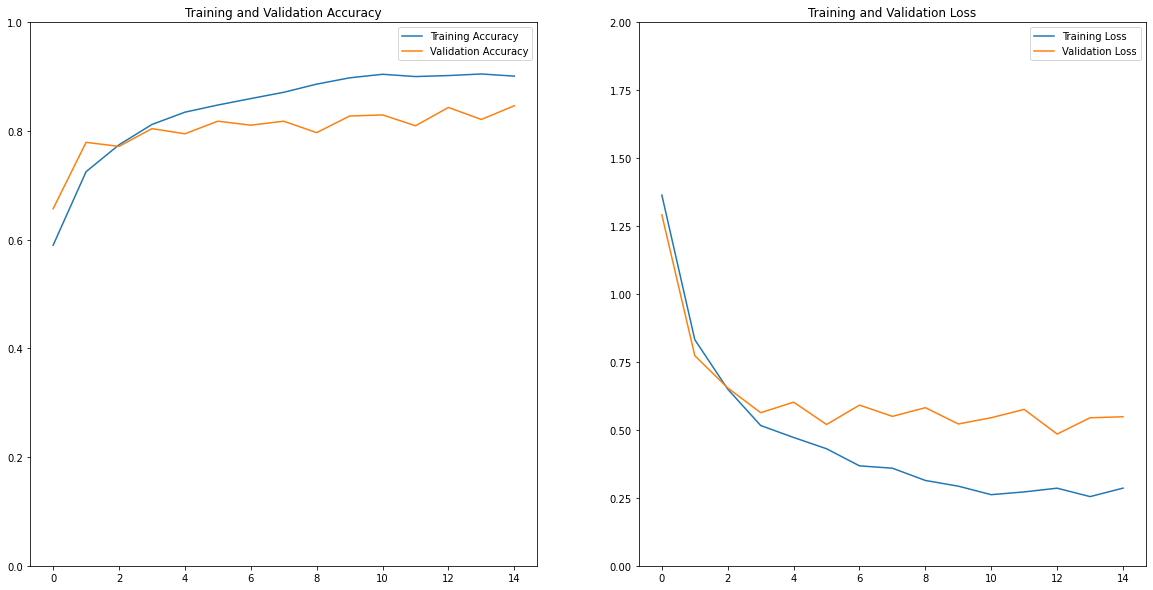

In [ ]:
acc = resnet_model_history.history['accuracy']
val_acc = resnet_model_history.history['val_accuracy']

loss = resnet_model_history.history['loss']
val_loss = resnet_model_history.history['val_loss']

epochs = range(15)

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylim([0,1])
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylim([0,2])
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

### Conclusion of PART - 3

<br>

<br>
<p>COMPARING WITH THE THREE PRETRAINED MODELS(VGG_16, INCEPTION_V3, RESNET50)
</p>
                  


<table class="table">
  <thead class="thead-dark">
    <tr>
      <th scope="col">Model</th>
      <th scope="col">Validation Accuracy</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>VGG_16</td>
      <td>76.02</td>
    </tr>
    <tr>
      <td>INCEPTION_V3</td>
      <td>66</td>
    </tr>
    <tr>
      <td>RESNET50</td>
      <td>83.37</td>
    </tr>
  </tbody>
</table>  
<br>
<p>RESNET50 MODEL HAVING THE HIGHEST VALIDATION ACCURACY.</p>
<br>
<p><b>CONCLUSION</b>: SO WE ARE USING THE RESNET50 MODEL TO SAVE AND LOAD WEIGHTS AND USING IT PREDICT THE TEST SAMPLES. </p>






<br><br><br>

### **PART - 4 : Scripts for using the highest Val_Accuracy for test dataset.**

To train the network and save the model with highest validation accuracy.

(from part 3 we got the highest validation accuracy is resnet50)



##### saving the resnet model

In [42]:
resnet_model.save('Highest_val_accuracy.h5')

##### loading our saved model into a new model


In [41]:
new_model = tf.keras.models.load_model('Highest_val_accuracy.h5')


##### loading the test data and predicting on the test data


In [ ]:
test_img = []
for i in os.listdir('test'):
  img = tf.keras.preprocessing.image.load_img('/content/test/' + i , target_size = (128,128,3))
  img = tf.keras.preprocessing.image.img_to_array(img)
  test_img.append(img)
test_img=np.array(test_img)
pred = new_model.predict(test_img)

In [ ]:
final=[]
for i in pred:
  t=np.argmax(i)
  final.append(t)

In [ ]:
final=np.array(final)
final.shape

(794,)

In [ ]:
for i in range(5):
  print(classes[final[i]])

Maize
Fat Hen
Loose Silky-bent
Black-grass
Loose Silky-bent


In [ ]:
import os

file_stat = os.stat('/content/Highest_val_accuracy.h5')
print(file_stat.st_size)

208176224


In [ ]:
x= [i for i in range(5)]
print(x)


[0, 1, 2, 3, 4]


In [27]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [30]:
!ls /content/gdrive/MyDrive

'Colab Notebooks'	       'NEERAJ'\''s Resume (3).pdf'
 IMG_20210803_150751.jpg       'NEERAJ'\''s Resume (4).pdf'
'IMG_20210827_193042 (1).jpg'  'NEERAJ'\''s Resume (5).pdf'
 IMG_20210827_193042.jpg       "NEERAJ's Resume.pdf"
 NeerajGanji		        PSX_20210321_152946.jpg
'NEERAJ'\''s Resume (1).pdf'    PSX_20210321_190049.jpg
'NEERAJ'\''s Resume (2).pdf'    PSX_20210415_002111.jpg


In [37]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [39]:
!ls /gdrive/MyDrive

'Colab Notebooks'	       'NEERAJ'\''s Resume (3).pdf'
 IMG_20210803_150751.jpg       'NEERAJ'\''s Resume (4).pdf'
'IMG_20210827_193042 (1).jpg'  'NEERAJ'\''s Resume (5).pdf'
 IMG_20210827_193042.jpg       "NEERAJ's Resume.pdf"
 NeerajGanji		        PSX_20210321_152946.jpg
'NEERAJ'\''s Resume (1).pdf'    PSX_20210321_190049.jpg
'NEERAJ'\''s Resume (2).pdf'    PSX_20210415_002111.jpg


In [43]:
import shutil
shutil.copy('/content/Highest_val_accuracy.h5','/gdrive/MyDrive')

'/gdrive/MyDrive/Highest_val_accuracy.h5'

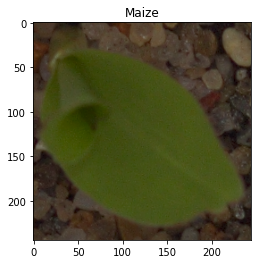

<Figure size 9216x9216 with 0 Axes>

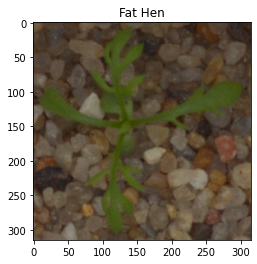

<Figure size 9216x9216 with 0 Axes>

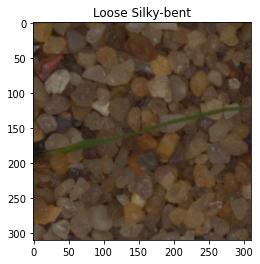

<Figure size 9216x9216 with 0 Axes>

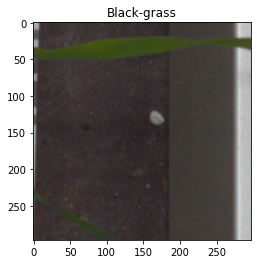

<Figure size 9216x9216 with 0 Axes>

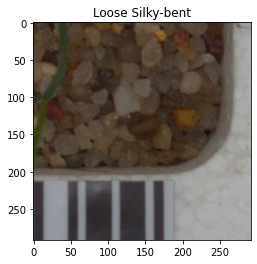

<Figure size 9216x9216 with 0 Axes>

In [ ]:
from pylab import imread,subplot,imshow,show

import matplotlib.pyplot as plt


for i,j in zip(x, os.listdir('/content/test/')):
  plt.title(classes[final[i]])
  image = imread('/content/test/'+j) 
  plt.imshow(image)
  plt.figure(figsize=(128, 128))
  plt.show()

### Thank you :)